# **FLOWER RECOGNITION**
[Source code](https://www.kaggle.com/code/suyashsunilraomorale/cnn-for-flower-recognition#Buliding-Model)

# Importing necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import splitfolders

from IPython.display import Image, display
from keras import layers, models

#from keras_tuner import RandomSearch
#from keras_tuner.engine.hyperparameters import HyperParameters
import random as rn
from sklearn.metrics import confusion_matrix, classification_report

**displaying flower images from each class**

daisy


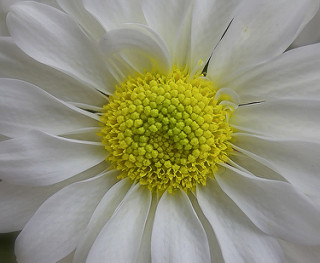

dandelion


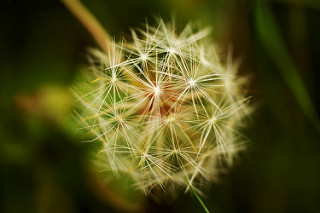

rose


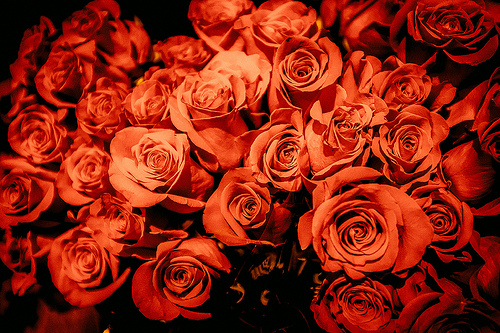

sunflower


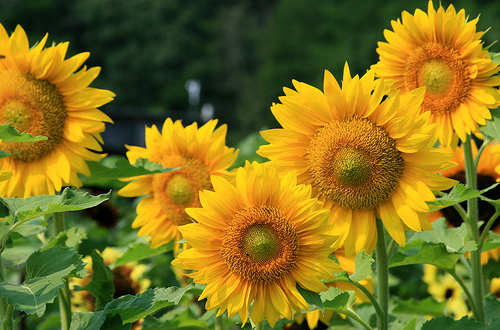

tulip


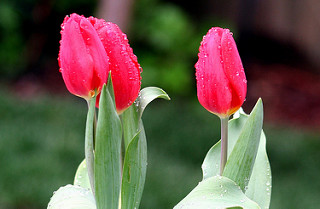

In [2]:
listOfImageNames = ['./datasets/daisy/100080576_f52e8ee070_n.jpg',
                    './datasets/dandelion/10043234166_e6dd915111_n.jpg',
                    './datasets/rose/10503217854_e66a804309.jpg',
                    './datasets/sunflower/1008566138_6927679c8a.jpg',
                    './datasets/tulip/100930342_92e8746431_n.jpg']
labels = ['daisy','dandelion','rose','sunflower','tulip']
for i,imageName in enumerate(listOfImageNames):
    print(labels[i])
    display(Image(filename=imageName))

# **creating a training and testing data**

In [3]:
# Model config
batch_size = 32
epochs = 50

target_size = (64,64)

In [4]:
splitfolders.ratio('./datasets/', './split_datasets/', seed=1337, ratio=(0.7,0.2,0.1))

Copying files: 4317 files [00:02, 2012.60 files/s]


DataGenerator
**Returns**
- A DirectoryIterator yielding tuples of (x, y) 
- where x is a numpy array containing a batch of images with shape (batch_size, *target_size, channels) 
- and y is a numpy array of corresponding labels.

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2
)

validate_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [6]:
train_data =  train_datagen.flow_from_directory(
        "./split_datasets/train",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

validate_data = validate_datagen.flow_from_directory(
        "./split_datasets/val",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

test_data =  test_datagen.flow_from_directory(
        "./split_datasets/test",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 3942 images belonging to 5 classes.
Found 1569 images belonging to 5 classes.
Found 830 images belonging to 5 classes.


**spliting above data into, data and labels**
1. total images in train_data = 3238, batch size = 32, therefore total no. of batches formed are 3238/32 = 101.
2. total images in test_data = 1079, batch size = 32, therefore total no. of batches formed are 1079/32 = 33.

In [7]:
# train_labels=[]
# traindata=[]
# for i in range(0,102):
#     train_labels.extend(np.array(train_data[i][1])) # x
#     traindata.extend(np.array(train_data[i][0])) # y
    
# test_labels=[]
# testdata=[]
# for i in range(0,34):
#     test_labels.extend(np.array(test_data[i][1]))
#     testdata.extend(np.array(test_data[i][0]))

In [8]:
len(test_data)

26

# **Buliding Model**

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 96)        55392     
                                         

2023-03-21 16:26:07.190934: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-21 16:26:07.191101: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


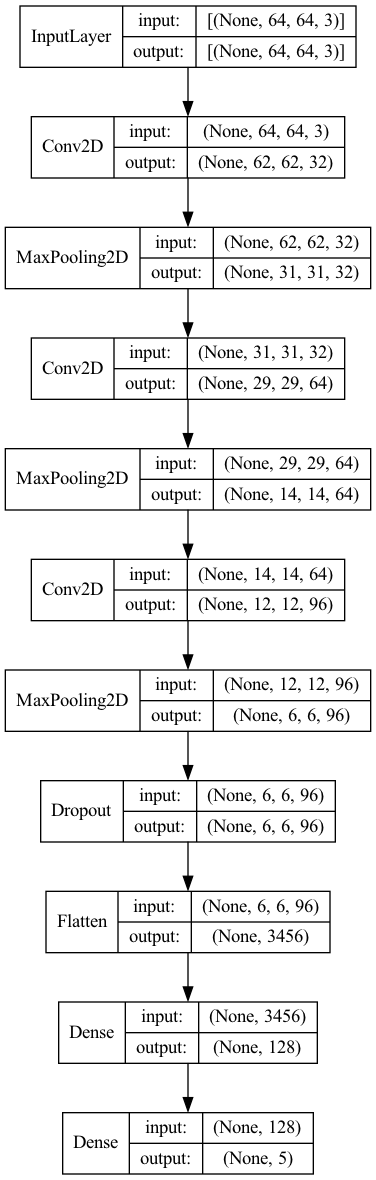

In [9]:
# Buile CNN model
cnn = models.Sequential()

cnn.add(Conv2D (32, (3,3), activation='relu', input_shape=[64, 64, 3]))
cnn.add(MaxPool2D (pool_size=2, strides=2))

cnn.add(Conv2D (64, (3,3), activation='relu'))
cnn.add(MaxPool2D (pool_size=2, strides=2))

cnn.add(Conv2D (96, (3,3), activation='relu'))
cnn.add(MaxPool2D (pool_size=2, strides=2))

cnn.add(Dropout (0.1))
cnn.add(Flatten ())

cnn.add(Dense (units=128, activation='relu'))
cnn.add(Dense (units=5, activation='softmax'))

# Show the summary of the model
cnn.summary()

plot_model(cnn, to_file='./output/cnn_model.png', 
           show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96)


## **Compile & train the model**

In [10]:
# compile the model
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# creating early stopping
es = EarlyStopping(monitor='val_loss', 
                   patience=10, mode='min')

# train the model
history = cnn.fit(train_data,
                verbose=1, validation_data= validate_data,
                batch_size= batch_size, epochs= epochs,
                callbacks=[es])

# save model
cnn.save('./output/cnn_model')

Epoch 1/50


2023-03-21 16:26:07.856550: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-21 16:26:08.212590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


124/124 [==============================] - ETA: 0s - loss: 1.3564 - accuracy: 0.3823

2023-03-21 16:26:19.254545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


124/124 [==============================] - 15s 114ms/step - loss: 1.3564 - accuracy: 0.3823 - val_loss: 1.2251 - val_accuracy: 0.4755
Epoch 2/50
124/124 [==============================] - 14s 112ms/step - loss: 1.1200 - accuracy: 0.5449 - val_loss: 1.0202 - val_accuracy: 0.5800
Epoch 3/50
124/124 [==============================] - 14s 110ms/step - loss: 1.0200 - accuracy: 0.5979 - val_loss: 1.1142 - val_accuracy: 0.5577
Epoch 4/50
124/124 [==============================] - 14s 117ms/step - loss: 0.9620 - accuracy: 0.6197 - val_loss: 1.0847 - val_accuracy: 0.5634
Epoch 5/50
124/124 [==============================] - 14s 114ms/step - loss: 0.9197 - accuracy: 0.6405 - val_loss: 0.9163 - val_accuracy: 0.6533
Epoch 6/50
124/124 [==============================] - 13s 105ms/step - loss: 0.8904 - accuracy: 0.6504 - val_loss: 0.8444 - val_accuracy: 0.6660
Epoch 7/50
124/124 [==============================] - 14s 111ms/step - loss: 0.8757 - accuracy: 0.6532 - val_loss: 0.8487 - val_accuracy: 0.6

INFO:tensorflow:Assets written to: ./output/cnn_model/assets


INFO:tensorflow:Assets written to: ./output/cnn_model/assets


# **Visualizing the performance**

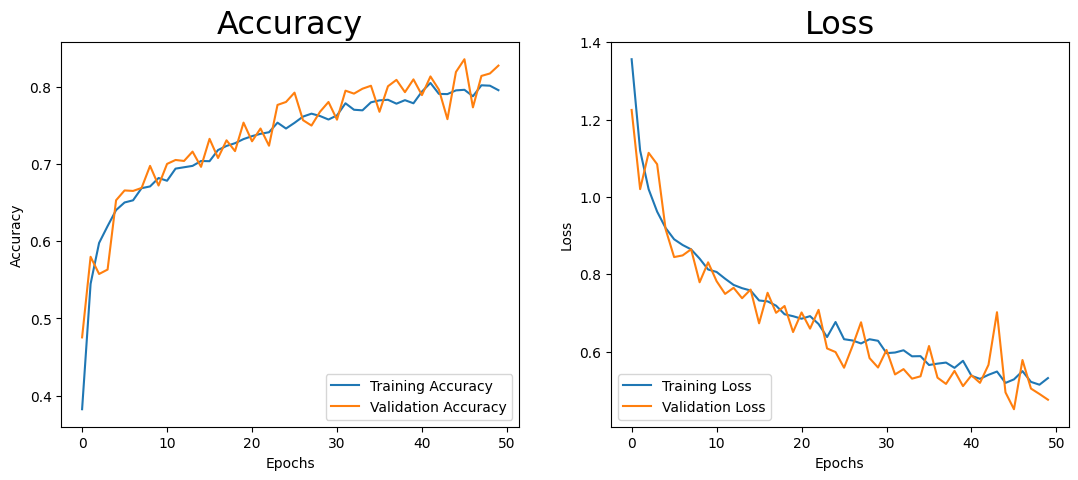

26/26 [==============================] - 2s 67ms/step - loss: 0.4720 - accuracy: 0.8289
Accuracy: 82.89156556129456


In [11]:
# visualzie the performance
plt.figure(figsize=(13, 5))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy',size='23')

# loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.title('Loss',size='23')

plt.savefig('./output/result_accuracy_loss.png')
plt.show()

# return accuray from the test_data
loss, accuracy= cnn.evaluate(test_data)
print(f'Accuracy: {accuracy*100}')

## **Evaluting the model on test data**

In [12]:
ths = len(test_data)/batch_size
print(ths)

0.8125


In [13]:
# Ground Truth of the testing data
test_labels=[]
testdata=[]

ths = len(test_data)/batch_size
print(ths)
for i in range(0,26):
    test_labels.extend(np.array(test_data[i][1]))
    testdata.extend(np.array(test_data[i][0]))

test_lbls = []
for i in test_labels:
    if all(i == [0., 0., 0., 0., 1.]):
        test_lbls.append('tulip')
    elif all(i == [0., 0., 0., 1., 0.]):
        test_lbls.append('sunflower')
    elif all(i == [0., 0., 1., 0., 0.]):
        test_lbls.append('rose')
    elif all(i == [0., 1., 0., 0., 0.]):
        test_lbls.append('dendelion')
    elif all(i == [1., 0., 0., 0., 0.]):
        test_lbls.append('daisy')

0.8125


In [14]:
# Predict via the CNN model trained above
pred = cnn.predict(test_data)
pred_digits = np.argmax(pred,axis=1)

# transforming one-hot encoding labels into actual labels name
pred_lbls = []
for i in pred_digits:
    if (i == 4):
        pred_lbls.append('tulip')
    elif (i == 3):
        pred_lbls.append('sunflower')
    elif (i == 2):
        pred_lbls.append('rose')
    elif (i == 1):
        pred_lbls.append('dendelion')
    elif (i == 0):
        pred_lbls.append('daisy')


 3/26 [==>...........................] - ETA: 0s

2023-03-21 16:37:32.941535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 2s 59ms/step


Rediciton result: prediction incorrect vs total: 8 vs 7


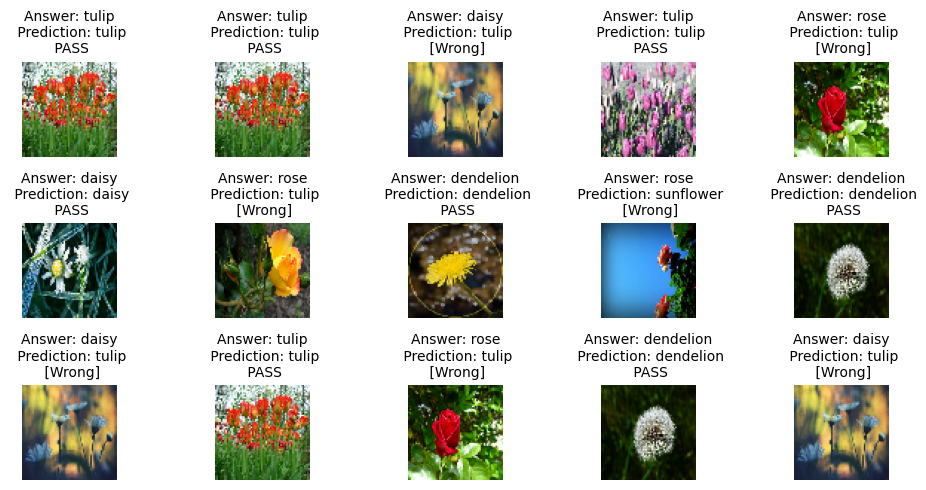

In [15]:
# Random pick prediction result
fig,ax=plt.subplots(3,5)
fig.set_size_inches(10,5)

correct, wrong = 0, 0
for i in range(3):
    for j in range (5):    
        flag = 'PASS'

        # compare prediciton and the answer
        idx = rn.randint(0, len(test_data))
        ax[i,j].set_axis_off()
        ax[i,j].imshow(testdata[idx])
        
        if (test_lbls[idx] != pred_lbls[idx]):
            flag = '[Wrong]'
            wrong += 1
        else:
            correct +=1

        ax[i,j].set_title('Answer: '+ test_lbls[idx]+ '\n Prediction: ' + pred_lbls[idx]+ '\n '+ flag, size='10')

plt.tight_layout()

plt.savefig('./output/cnn_pred_result.png')
print(f"Rediciton result: prediction incorrect vs total: {correct} vs {wrong}")

In [16]:
lbls = np.array(test_lbls)
len(lbls)

len(pred_digits)

830

In [17]:
# Get confusion_matrix and classification from tensorflow
m = confusion_matrix(test_lbls, pred_lbls)
report = classification_report(test_lbls, pred_lbls)
print(report)

# export classification_report.txt 
f = open("./output/classification_report.txt", "x")
f.write(report)
f.close()

# plot_confusion_matrix from mlxtend
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=m,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True)
plt.savefig('./output/confusion_matrix.png')
plt.show()


              precision    recall  f1-score   support

       daisy       0.89      0.86      0.88       147
   dendelion       0.90      0.86      0.88       200
        rose       0.77      0.75      0.76       151
   sunflower       0.75      0.94      0.84       140
       tulip       0.82      0.74      0.78       192

    accuracy                           0.83       830
   macro avg       0.83      0.83      0.83       830
weighted avg       0.83      0.83      0.83       830



FileExistsError: [Errno 17] File exists: './output/classification_report.txt'